## Applying libraries

In [189]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

import os

from sklearn.model_selection import train_test_split


In [190]:
import os

link_train_benign = '/Users/dmitry/Desktop/python/cancer detection/data/train/benign/'
link_train_malignant = '/Users/dmitry/Desktop/python/cancer detection/data/train/malignant/'
link_test_benign = '/Users/dmitry/Desktop/python/cancer detection/data/test/benign/'
link_test_malignant = '/Users/dmitry/Desktop/python/cancer detection/data/test/malignant/'

train_benign_list = os.listdir(link_train_benign)
train_malignant_list = os.listdir(link_train_malignant)
test_benign_list = os.listdir(link_test_benign)
test_malignant_list = os.listdir(link_test_malignant)




## Creating csv files with data of images

In [3]:
# Create labels
train_benign_label = np.zeros(len(train_benign_list))
train_malign_label = np.ones(len(train_malignant_list))
test_benign_label = np.zeros(len(test_benign_list))
test_malign_label = np.ones(len(test_malignant_list))

In [4]:
# Merge data 
X_train = np.concatenate((train_benign_list, train_malignant_list), axis = 0)
Y_train = np.concatenate((train_benign_label, train_malign_label), axis = 0)
X_test = np.concatenate((test_benign_list, test_malignant_list), axis = 0)
Y_test = np.concatenate((test_benign_label, test_malign_label), axis = 0)

In [5]:
import pandas as pd
target_train = pd.DataFrame()
target_train['file_name'] = X_train
target_train['type'] = Y_train

target_test = pd.DataFrame()
target_test['file_name'] = X_test
target_test['type'] = Y_test

In [15]:
# выводим 16 изображений
datagen = ImageDataGenerator(rescale=1/255.)

datagen_flow = datagen.flow_from_dataframe(dataframe=target_train,
                                           directory='/Users/dmitry/Desktop/python/cancer detection/data/train/benign/',
                                           x_col='file_name',
                                           y_col='type',
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='raw',
                                           seed=12345
                                          )

Found 2396 validated image filenames.


/Users/dmitry/anaconda3/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 241 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  warnings.warn(


TypeError: Image data of dtype <U8 cannot be converted to float

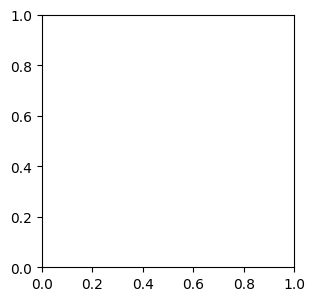

In [21]:
#Now we can split it into a training and validation set.

x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train,
    test_size=0.25,
    random_state=12345
)

#Display Some Images
# Display first 15 images of moles, and how they are classified

w = 60
h = 40
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows):
    ax = fig.add_subplot(rows, columns, i)
#    if np.argmax(Y_train[i]) == 0:
#        ax.title.set_text('Benign')
#    else:
#        ax.title.set_text('Malignant')
    plt.imshow(X_train[i])
    
    #fig_malignant.add_subplot(rows, columns, i+1)
    #plt.imshow(train_malignant_img[i])
plt.savefig('Display_Bengin_vs_Malignant.png')


In [ ]:
rows = 5
columns = 4
num_ing = rows * columns

train_benign_img = []
train_malignant_img = []

for i in range (0,num_ing):
    train_benign_img.append(plt.imread(link_train_benign + train_benign_list[i]))
    train_malignant_img.append(plt.imread(link_train_malignant + train_malignant_list[i]))

fig_benign = plt.figure(figsize=(columns,rows))
plt.title('train_benign_img')
plt.xticks([])
plt.yticks([])

for i in range(num_ing):
    fig_benign.add_subplot(rows, columns, i+1)
    plt.imshow(train_benign_img[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


fig_malignant = plt.figure(figsize=(columns,rows))
plt.title('train_malignant_img')
plt.xticks([])
plt.yticks([])

for i in range(num_ing):
    fig_malignant.add_subplot(rows, columns, i+1)
    plt.imshow(train_malignant_img[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Adding files

In [245]:
image_width = 100
image_height = 100

link_data_train = '/Users/dmitry/Desktop/python/cancer detection/data/train'
link_data_test = '/Users/dmitry/Desktop/python/cancer detection/data/test'

link_train_benign = '/Users/dmitry/Desktop/python/cancer detection/data/train/benign/'
link_train_malignant = '/Users/dmitry/Desktop/python/cancer detection/data/train/malignant/'

train_samples = 1970
validation_samples = 650
epochs = 30
batch_size = 3  #batch_size 

input_shape = (image_width, image_height, 3)

In [246]:
import os

train_benign_list = os.listdir(link_train_benign)
train_malignant_list = os.listdir(link_train_malignant)

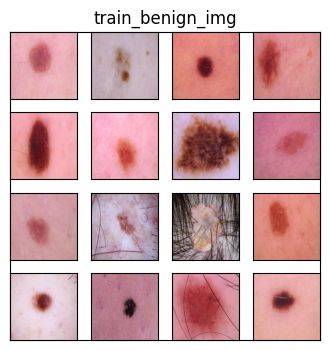

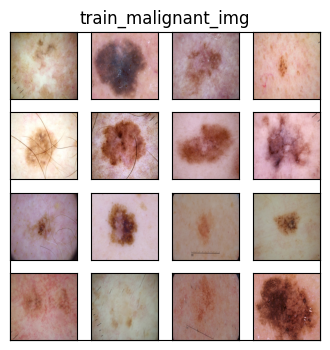

In [247]:
rows = 4
columns = 4
num_ing = rows * columns

train_benign_img = []
train_malignant_img = []

for i in range (0,num_ing):
    train_benign_img.append(plt.imread(link_train_benign + train_benign_list[i]))
    train_malignant_img.append(plt.imread(link_train_malignant + train_malignant_list[i]))

fig_benign = plt.figure(figsize=(columns,rows))
plt.title('train_benign_img')
plt.xticks([])
plt.yticks([])

for i in range(num_ing):
    fig_benign.add_subplot(rows, columns, i+1)
    plt.imshow(train_benign_img[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


fig_malignant = plt.figure(figsize=(columns,rows))
plt.title('train_malignant_img')
plt.xticks([])
plt.yticks([])

for i in range(num_ing):
    fig_malignant.add_subplot(rows, columns, i+1)
    plt.imshow(train_malignant_img[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Creating a neural network

In [216]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D

pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(32, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(32, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(64, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Четвертый слой нейросети
pattern.add(Conv2D(32, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

pattern.add(Conv2D(32, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))



#Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(2))# число классов
pattern.add(Activation('softmax'))

#Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
pattern.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [248]:
# Задаём параметры аугментации
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   horizontal_flip=360)
test_datagen = ImageDataGenerator(rescale=1./255)

In [249]:
#Предобработка обучающей выборки
train_processing = train_datagen.flow_from_directory(link_data_train,
                                                     target_size=(image_width, image_height), # Размер изображений
                                                     batch_size=batch_size, #Размер пакетов данных
                                                     class_mode='categorical') # Режим класса

validation_processing= test_datagen.flow_from_directory(link_data_test,
                                                        target_size=(image_width, image_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


Epoch 1/30


/var/folders/tk/9chf0hp54s55zy3ttqs476dh0000gn/T/ipykernel_41794/3244971928.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку


656/656 [==============================] - 9s 13ms/step - loss: 0.6047 - accuracy: 0.6611 - val_loss: 0.4165 - val_accuracy: 0.7865
Epoch 2/30
656/656 [==============================] - 7s 11ms/step - loss: 0.5176 - accuracy: 0.7412 - val_loss: 0.5308 - val_accuracy: 0.7665
Epoch 3/30
656/656 [==============================] - 7s 11ms/step - loss: 0.4915 - accuracy: 0.7600 - val_loss: 0.4088 - val_accuracy: 0.7957
Epoch 4/30
656/656 [==============================] - 7s 10ms/step - loss: 0.4768 - accuracy: 0.7854 - val_loss: 0.5159 - val_accuracy: 0.7235
Epoch 5/30
656/656 [==============================] - 7s 11ms/step - loss: 0.4668 - accuracy: 0.7854 - val_loss: 0.4635 - val_accuracy: 0.7865
Epoch 6/30
656/656 [==============================] - 7s 10ms/step - loss: 0.4627 - accuracy: 0.7874 - val_loss: 0.4220 - val_accuracy: 0.8249
Epoch 7/30
656/656 [==============================] - 7s 10ms/step - loss: 0.4795 - accuracy: 0.7661 - val_loss: 0.3681 - val_accuracy: 0.8310
Epoch 8/30

<Axes: >

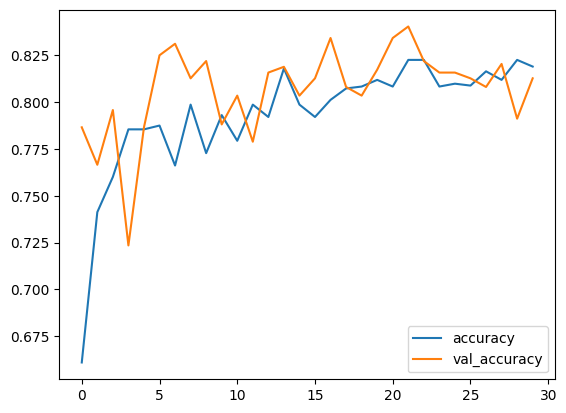

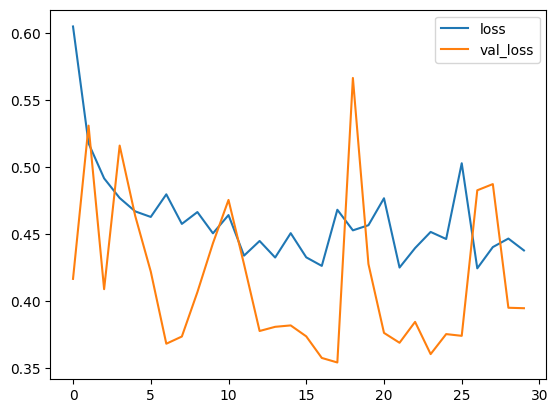

In [250]:
#50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D

pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(16, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(16, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(16, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

#Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(2))# число классов
pattern.add(Activation('softmax'))

#Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
pattern.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


# Задаём параметры аугментации
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   horizontal_flip=360)
test_datagen = ImageDataGenerator(rescale=1./255)

qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку
                      steps_per_epoch=train_samples / batch_size, #количество итераций пакета до того, как период обучения считается завершенным
                      epochs=epochs, # Указываем количество эпох
                      validation_data=validation_processing, # Помещаем проверочную выборку
                      validation_steps=validation_samples/ batch_size)

qwe3_df = pd.DataFrame(qwe3.history)
#display(qwe3_df)
qwe3_df[['accuracy', 'val_accuracy']].plot()

qwe3_df[['loss', 'val_loss']].plot()

In [ ]:
#100
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D

pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(8, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

#Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(2))# число классов
pattern.add(Activation('softmax'))

#Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
pattern.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


# Задаём параметры аугментации
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=360)
test_datagen = ImageDataGenerator(rescale=1./255)

qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку
                      steps_per_epoch=train_samples / batch_size, #количество итераций пакета до того, как период обучения считается завершенным
                      epochs=epochs, # Указываем количество эпох
                      validation_data=validation_processing, # Помещаем проверочную выборку
                      validation_steps=validation_samples/ batch_size)

qwe3_df = pd.DataFrame(qwe3.history)
#display(qwe3_df)
qwe3_df[['accuracy', 'val_accuracy']].plot()

qwe3_df[['loss', 'val_loss']].plot()

Epoch 1/50


/var/folders/tk/9chf0hp54s55zy3ttqs476dh0000gn/T/ipykernel_41794/3147514128.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку


394/394 [==============================] - 15s 36ms/step - loss: 0.6149 - accuracy: 0.6924 - val_loss: 0.5177 - val_accuracy: 0.7138
Epoch 2/50
394/394 [==============================] - 14s 36ms/step - loss: 0.5023 - accuracy: 0.7651 - val_loss: 0.4854 - val_accuracy: 0.7262
Epoch 3/50
394/394 [==============================] - 14s 36ms/step - loss: 0.4924 - accuracy: 0.7675 - val_loss: 0.3964 - val_accuracy: 0.8123
Epoch 4/50
394/394 [==============================] - 14s 36ms/step - loss: 0.4756 - accuracy: 0.7799 - val_loss: 0.4234 - val_accuracy: 0.7708
Epoch 5/50
394/394 [==============================] - 14s 36ms/step - loss: 0.4638 - accuracy: 0.7853 - val_loss: 0.4130 - val_accuracy: 0.7754
Epoch 6/50
394/394 [==============================] - 14s 36ms/step - loss: 0.4701 - accuracy: 0.7860 - val_loss: 0.4218 - val_accuracy: 0.8062
Epoch 7/50
394/394 [==============================] - 14s 36ms/step - loss: 0.4293 - accuracy: 0.8002 - val_loss: 0.4501 - val_accuracy: 0.7646
Epo

<Axes: >

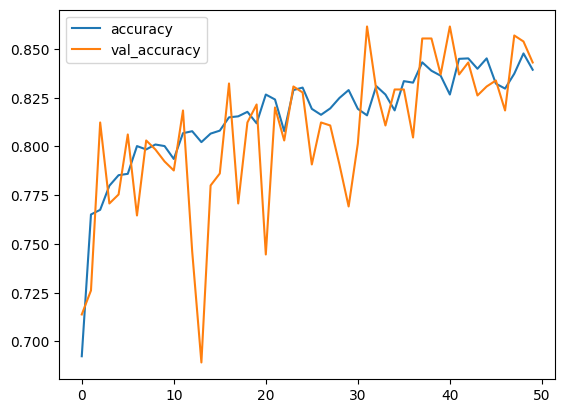

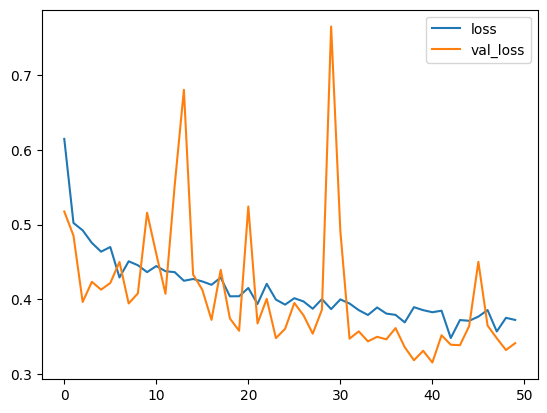

In [198]:
#50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D

pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(8, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

#Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(120))# число классов
pattern.add(Dense(32))# число классов
pattern.add(Dense(2))# число классов
pattern.add(Activation('softmax'))

#Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
pattern.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


# Задаём параметры аугментации
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=360)
test_datagen = ImageDataGenerator(rescale=1./255)

qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку
                      steps_per_epoch=train_samples / batch_size, #количество итераций пакета до того, как период обучения считается завершенным
                      epochs=epochs, # Указываем количество эпох
                      validation_data=validation_processing, # Помещаем проверочную выборку
                      validation_steps=validation_samples/ batch_size)

qwe3_df = pd.DataFrame(qwe3.history)
#display(qwe3_df)
qwe3_df[['accuracy', 'val_accuracy']].plot()

qwe3_df[['loss', 'val_loss']].plot()

Epoch 1/30


/var/folders/tk/9chf0hp54s55zy3ttqs476dh0000gn/T/ipykernel_41794/2726376578.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку


656/656 [==============================] - 9s 13ms/step - loss: 0.6065 - accuracy: 0.6677 - val_loss: 0.4673 - val_accuracy: 0.7727
Epoch 2/30
656/656 [==============================] - 7s 11ms/step - loss: 0.5237 - accuracy: 0.7397 - val_loss: 0.4409 - val_accuracy: 0.7696
Epoch 3/30
656/656 [==============================] - 7s 10ms/step - loss: 0.4999 - accuracy: 0.7494 - val_loss: 0.4651 - val_accuracy: 0.7696
Epoch 4/30
656/656 [==============================] - 6s 9ms/step - loss: 0.4822 - accuracy: 0.7626 - val_loss: 0.5212 - val_accuracy: 0.7834
Epoch 5/30
656/656 [==============================] - 6s 9ms/step - loss: 0.4775 - accuracy: 0.7752 - val_loss: 0.4209 - val_accuracy: 0.7880
Epoch 6/30
656/656 [==============================] - 6s 10ms/step - loss: 0.4706 - accuracy: 0.7813 - val_loss: 0.4304 - val_accuracy: 0.7896
Epoch 7/30
656/656 [==============================] - 6s 9ms/step - loss: 0.4729 - accuracy: 0.7717 - val_loss: 0.4038 - val_accuracy: 0.7988
Epoch 8/30
65

<Axes: >

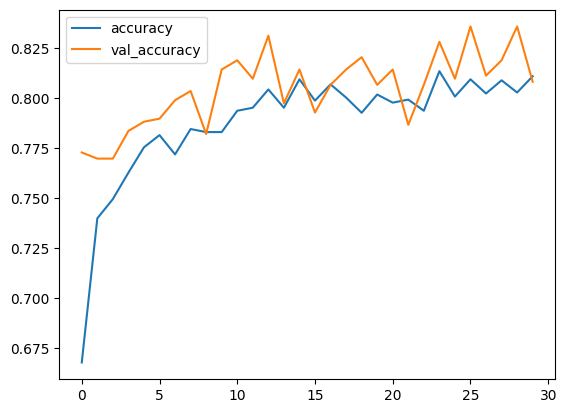

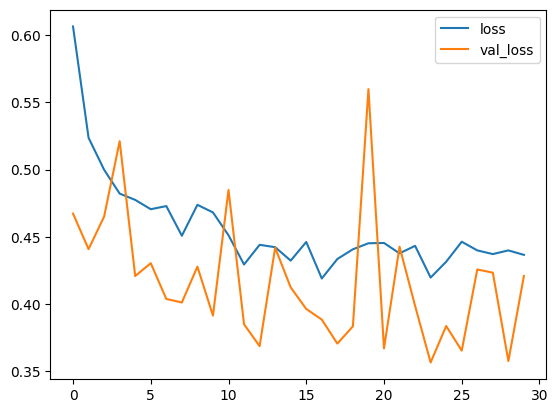

In [251]:
#100
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D

pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(8, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

#Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(120))# число классов
pattern.add(Dense(32))# число классов
pattern.add(Dense(2))# число классов
pattern.add(Activation('softmax'))

#Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
pattern.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


# Задаём параметры аугментации
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   horizontal_flip=360)
test_datagen = ImageDataGenerator(rescale=1./255)

qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку
                      steps_per_epoch=train_samples / batch_size, #количество итераций пакета до того, как период обучения считается завершенным
                      epochs=epochs, # Указываем количество эпох
                      validation_data=validation_processing, # Помещаем проверочную выборку
                      validation_steps=validation_samples/ batch_size)

qwe3_df = pd.DataFrame(qwe3.history)
#display(qwe3_df)
qwe3_df[['accuracy', 'val_accuracy']].plot()

qwe3_df[['loss', 'val_loss']].plot()

Epoch 1/50


/var/folders/tk/9chf0hp54s55zy3ttqs476dh0000gn/T/ipykernel_41794/1122426037.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку


394/394 [==============================] - 28s 70ms/step - loss: 0.7144 - accuracy: 0.6355 - val_loss: 1.2474 - val_accuracy: 0.6508
Epoch 2/50
394/394 [==============================] - 33s 83ms/step - loss: 0.6026 - accuracy: 0.7143 - val_loss: 0.5186 - val_accuracy: 0.7985
Epoch 3/50
394/394 [==============================] - 31s 78ms/step - loss: 0.5300 - accuracy: 0.7438 - val_loss: 0.4393 - val_accuracy: 0.7846
Epoch 4/50
394/394 [==============================] - 28s 70ms/step - loss: 0.4954 - accuracy: 0.7660 - val_loss: 0.4060 - val_accuracy: 0.8185
Epoch 5/50
394/394 [==============================] - 28s 70ms/step - loss: 0.4959 - accuracy: 0.7722 - val_loss: 0.4468 - val_accuracy: 0.7785
Epoch 6/50
394/394 [==============================] - 28s 70ms/step - loss: 0.4680 - accuracy: 0.7895 - val_loss: 0.4191 - val_accuracy: 0.7815
Epoch 7/50
394/394 [==============================] - 28s 70ms/step - loss: 0.4697 - accuracy: 0.7880 - val_loss: 0.4901 - val_accuracy: 0.7600
Epo

<Axes: >

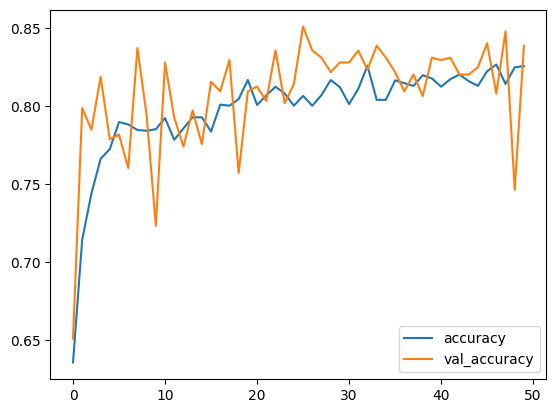

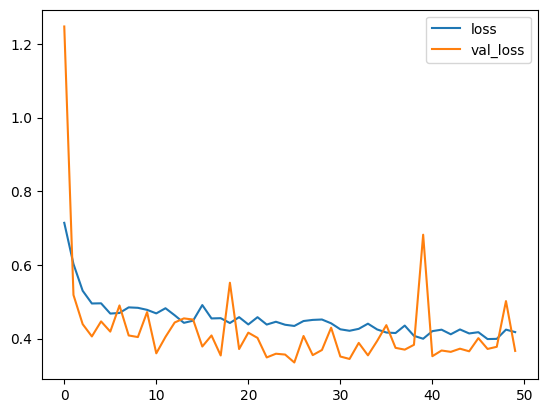

In [199]:
#50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D

pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(8, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

#Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(120))# число классов
pattern.add(Dense(80))# число классов
pattern.add(Dense(40))# число классов
pattern.add(Dense(20))# число классов
pattern.add(Dense(2))# число классов
pattern.add(Activation('softmax'))

#Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
pattern.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


# Задаём параметры аугментации
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=360)
test_datagen = ImageDataGenerator(rescale=1./255)

qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку
                      steps_per_epoch=train_samples / batch_size, #количество итераций пакета до того, как период обучения считается завершенным
                      epochs=epochs, # Указываем количество эпох
                      validation_data=validation_processing, # Помещаем проверочную выборку
                      validation_steps=validation_samples/ batch_size)

qwe3_df = pd.DataFrame(qwe3.history)
#display(qwe3_df)
qwe3_df[['accuracy', 'val_accuracy']].plot()

qwe3_df[['loss', 'val_loss']].plot()

Epoch 1/30


/var/folders/tk/9chf0hp54s55zy3ttqs476dh0000gn/T/ipykernel_41794/528962984.py:43: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку


656/656 [==============================] - 7s 9ms/step - loss: 0.5635 - accuracy: 0.7194 - val_loss: 0.6131 - val_accuracy: 0.7527
Epoch 2/30
656/656 [==============================] - 6s 10ms/step - loss: 0.5098 - accuracy: 0.7585 - val_loss: 0.7658 - val_accuracy: 0.6144
Epoch 3/30
656/656 [==============================] - 6s 9ms/step - loss: 0.4774 - accuracy: 0.7752 - val_loss: 0.4959 - val_accuracy: 0.7435
Epoch 4/30
656/656 [==============================] - 6s 10ms/step - loss: 0.4919 - accuracy: 0.7752 - val_loss: 0.4216 - val_accuracy: 0.8065
Epoch 5/30
656/656 [==============================] - 6s 9ms/step - loss: 0.4788 - accuracy: 0.7829 - val_loss: 0.3872 - val_accuracy: 0.8095
Epoch 6/30
656/656 [==============================] - 6s 9ms/step - loss: 0.4749 - accuracy: 0.7884 - val_loss: 0.4306 - val_accuracy: 0.7742
Epoch 7/30
656/656 [==============================] - 6s 10ms/step - loss: 0.4632 - accuracy: 0.7788 - val_loss: 0.4593 - val_accuracy: 0.7727
Epoch 8/30
656

<Axes: >

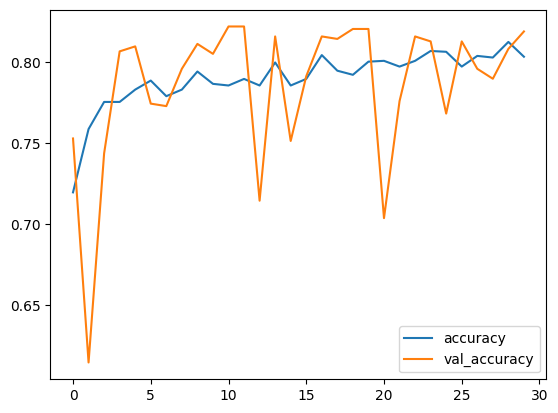

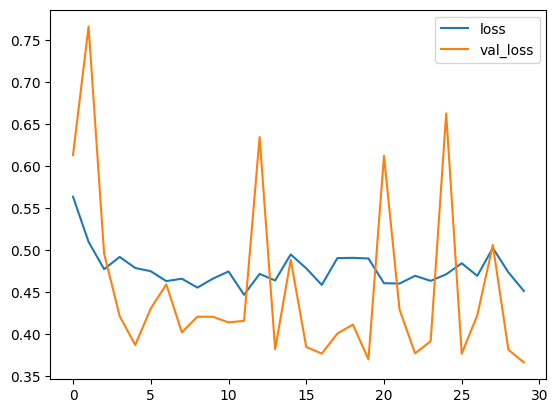

In [252]:
# 100
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D

pattern = Sequential() # Создание модели

# Первый слой нейросети
pattern.add(Conv2D(8, (3, 3), input_shape=input_shape))
pattern.add(Activation('relu'))
pattern.add(MaxPooling2D(pool_size=(2, 2)))

# Второй слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

# Третий слой нейросети
pattern.add(Conv2D(8, (3, 3)))
pattern.add(Activation('relu'))
pattern.add(AveragePooling2D(pool_size=(2, 2)))

#Aктивация, свертка, объединение, исключение
pattern.add(Flatten())
pattern.add(Dense(120))# число классов
pattern.add(Dense(80))# число классов
pattern.add(Dense(40))# число классов
pattern.add(Dense(20))# число классов
pattern.add(Dense(2))# число классов
pattern.add(Activation('softmax'))

#Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
pattern.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


# Задаём параметры аугментации
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   horizontal_flip=360)
test_datagen = ImageDataGenerator(rescale=1./255)

qwe3 = pattern.fit_generator(train_processing, # Помещаем обучающую выборку
                      steps_per_epoch=train_samples / batch_size, #количество итераций пакета до того, как период обучения считается завершенным
                      epochs=epochs, # Указываем количество эпох
                      validation_data=validation_processing, # Помещаем проверочную выборку
                      validation_steps=validation_samples/ batch_size)

qwe3_df = pd.DataFrame(qwe3.history)
#display(qwe3_df)
qwe3_df[['accuracy', 'val_accuracy']].plot()

qwe3_df[['loss', 'val_loss']].plot()

In [143]:
pattern.save_weights('first_model_weights.h5') #Сохранение весов модели
pattern.save('path') #Сохранение модели
pattern.load_weights('first_model_weights.h5') # Загрузка весов модели
prediction = pattern.predict(validation_processing) #Использование модели для предсказания

INFO:tensorflow:Assets written to: path/assets


INFO:tensorflow:Assets written to: path/assets


660/660 [==============================] - 2s 3ms/step


In [144]:
prediction.shape

(660, 2)

In [150]:
df= pd.DataFrame(data = prediction, columns = ['0','1'])


,0,1
0,0.037701,9.622995e-01
1,1.000000,1.052947e-10
2,0.025477,9.745233e-01
3,0.241168,7.588317e-01
4,0.389405,6.105951e-01
...,...,...
655,1.000000,2.019934e-21
656,0.355049,6.449509e-01
657,1.000000,2.084598e-10
658,1.000000,5.017082e-11
